# A group project

## Setup

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os
import pandas as pd
import seaborn as sns

#
pd.set_option("display.max_rows", 999)

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12


# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

Select a PATH pointing to your working directory - where your datasets are saved

In [2]:
PATH = r'C:\Users\WZ\Downloads\Week 3'

Then use the \<os> module to change your current (default) working directory to PATH, your new working directory

In [3]:
os.chdir(PATH)

**Import the \<California_Houses.csv> dataset from your working directory**

In [4]:
df = pd.read_csv("California_Houses.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Median_House_Value        20640 non-null  float64
 1   Median_Income             20640 non-null  float64
 2   Median_Age                20640 non-null  int64  
 3   Tot_Rooms                 20640 non-null  int64  
 4   Tot_Bedrooms              20640 non-null  int64  
 5   Population                20640 non-null  int64  
 6   Households                20640 non-null  int64  
 7   Latitude                  20640 non-null  float64
 8   Longitude                 20640 non-null  float64
 9   Distance_to_coast         20640 non-null  float64
 10  Distance_to_LA            20640 non-null  float64
 11  Distance_to_SanDiego      20640 non-null  float64
 12  Distance_to_SanJose       20640 non-null  float64
 13  Distance_to_SanFrancisco  20640 non-null  float64
dtypes: flo

**Each row of the dataset represents one district in California**<br>
Have a look a the first and last few rows

In [6]:
df.head(5)

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568


In [7]:
df2 = df.copy()

### Create a categorical  variable \<Closest_city> indicating the closest CA city and drop the distance to each city

*Hint : you may wish to associate the name of each city to the smallest distance among the four cities*

Save the transformed dataset as "housing"

In [8]:
df2["Closest_City"] = [
    df2.loc[
        i,
        [
            "Distance_to_LA",
            "Distance_to_SanDiego",
            "Distance_to_SanJose",
            "Distance_to_SanFrancisco",
        ],
    ]
    .idxmax()
    .split("_")[2]
    for i in range(len(df2))
]
df2.drop(
    [
        "Distance_to_LA",
        "Distance_to_SanDiego",
        "Distance_to_SanJose",
        "Distance_to_SanFrancisco",
    ],
    axis=1,
    inplace=True,
)
housing = df2.copy()

In [9]:
housing

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Closest_City
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,SanDiego
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,SanDiego
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,SanDiego
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,SanDiego
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,SanDiego
...,...,...,...,...,...,...,...,...,...,...,...
20635,78100.0,1.5603,25,1665,374,845,330,39.48,-121.09,162031.481121,SanDiego
20636,77100.0,2.5568,18,697,150,356,114,39.49,-121.21,160445.433537,SanDiego
20637,92300.0,1.7000,17,2254,485,1007,433,39.43,-121.22,153754.341182,SanDiego
20638,84700.0,1.8672,18,1860,409,741,349,39.43,-121.32,152005.022239,SanDiego


**Display the summary of your new dataframe**

In [10]:
def univ_cat(df, var):
    df_abs = pd.DataFrame(df[var].value_counts(),index = df[var].value_counts().index)
    df_rel = pd.DataFrame(df[var].value_counts(normalize=True),index = df[var].value_counts(normalize=True).index)
    df_summary = pd.concat([df_abs,df_rel],axis=1)
    df_summary.columns=['absolute','relative']
    return df_summary

In [11]:
univ_cat(df = df2, var = "Closest_City")

,absolute,relative
Closest_City,,
SanFrancisco,11547,0.559448
SanDiego,9093,0.440552


# Part 1 - Data explorations

### What do you notice? 

- which attributes are quantitative ?
- which attributes are not quantitative? and what are their types?

In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Median_House_Value  20640 non-null  float64
 1   Median_Income       20640 non-null  float64
 2   Median_Age          20640 non-null  int64  
 3   Tot_Rooms           20640 non-null  int64  
 4   Tot_Bedrooms        20640 non-null  int64  
 5   Population          20640 non-null  int64  
 6   Households          20640 non-null  int64  
 7   Latitude            20640 non-null  float64
 8   Longitude           20640 non-null  float64
 9   Distance_to_coast   20640 non-null  float64
 10  Closest_City        20640 non-null  object 
dtypes: float64(5), int64(5), object(1)
memory usage: 1.7+ MB


Quantitative Attributes:
1. Median_House_Value: The median value of owner-occupied homes in a neighborhood. It is a continuous numerical variable represented as a float.

2. Median_Income: The median income of households in a neighborhood. It is a continuous numerical variable represented as a float.

3. Median_Age: The median age of residents in a neighborhood. It is a discrete numerical variable represented as an integer.

4. Tot_Rooms: The total number of rooms in houses within a neighborhood. It is a discrete numerical variable represented as an integer.

5. Tot_Bedrooms: The total number of bedrooms in houses within a neighborhood. It is a discrete numerical variable represented as an integer.

6. Population: The total population of residents in a neighborhood. It is a discrete numerical variable represented as an integer.

7. Households: The total number of households in a neighborhood. It is a discrete numerical variable represented as an integer.

8. Distance_to_coast: The distance of the neighborhood from the nearest coast or shoreline. It is a continuous numerical variable represented as a float.

Non-Quantitative Attributes:
9. Latitude: The geographical latitude coordinate of the neighborhood. It is a non-quantitative attribute represented as a float.

10. Longitude: The geographical longitude coordinate of the neighborhood. It is a non-quantitative attribute represented as a float.

11. Closest_City: The name of the closest city or location to the neighborhood. It is a non-quantitative categorical attribute represented as an object (string).

These attributes provide various characteristics and information about the neighborhoods in your dataset, including housing, demographic, and geographical data.

### Find out what categories exist in 'Closest_city' column and how many districts belong to each category.


In [13]:
unique_values = df2['Closest_City'].unique()
print(unique_values)
uv_count = df2["Closest_City"].value_counts()
uv_count

['SanDiego' 'SanFrancisco']


Closest_City
SanFrancisco    11547
SanDiego         9093
Name: count, dtype: int64

### Show a summary of the quantitative attributes
**Use tables and plots**

In [14]:
# Calculate summary statistics for quantitative attributes
summary_table = df2[["Median_House_Value", "Median_Income", "Median_Age", "Tot_Rooms", "Tot_Bedrooms", 
                     "Population", "Households", "Distance_to_coast"]].describe()

# Transpose the summary table for a better format
summary_table = summary_table.T

# Calculate IQR for each attribute
summary_table["IQR"] = summary_table["75%"] - summary_table["25%"]

# Rename columns for clarity
summary_table = summary_table.rename(columns={
    "count": "Count",
    "mean": "Mean",
    "std": "Standard Deviation",
    "min": "Minimum",
    "25%": "25th Percentile",
    "50%": "Median",
    "75%": "75th Percentile",
    "max": "Maximum"
})

# Display the summary table
print(summary_table)


                      Count           Mean  Standard Deviation       Minimum  \
Median_House_Value  20640.0  206855.816909       115395.615874  14999.000000   
Median_Income       20640.0       3.870671            1.899822      0.499900   
Median_Age          20640.0      28.639486           12.585558      1.000000   
Tot_Rooms           20640.0    2635.763081         2181.615252      2.000000   
Tot_Bedrooms        20640.0     537.898014          421.247906      1.000000   
Population          20640.0    1425.476744         1132.462122      3.000000   
Households          20640.0     499.539680          382.329753      1.000000   
Distance_to_coast   20640.0   40509.264883        49140.039160    120.676447   

                    25th Percentile         Median  75th Percentile  \
Median_House_Value    119600.000000  179700.000000    264725.000000   
Median_Income              2.563400       3.534800         4.743250   
Median_Age                18.000000      29.000000        37.00000

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

C:\Users\WZ\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\WZ\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\WZ\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
 

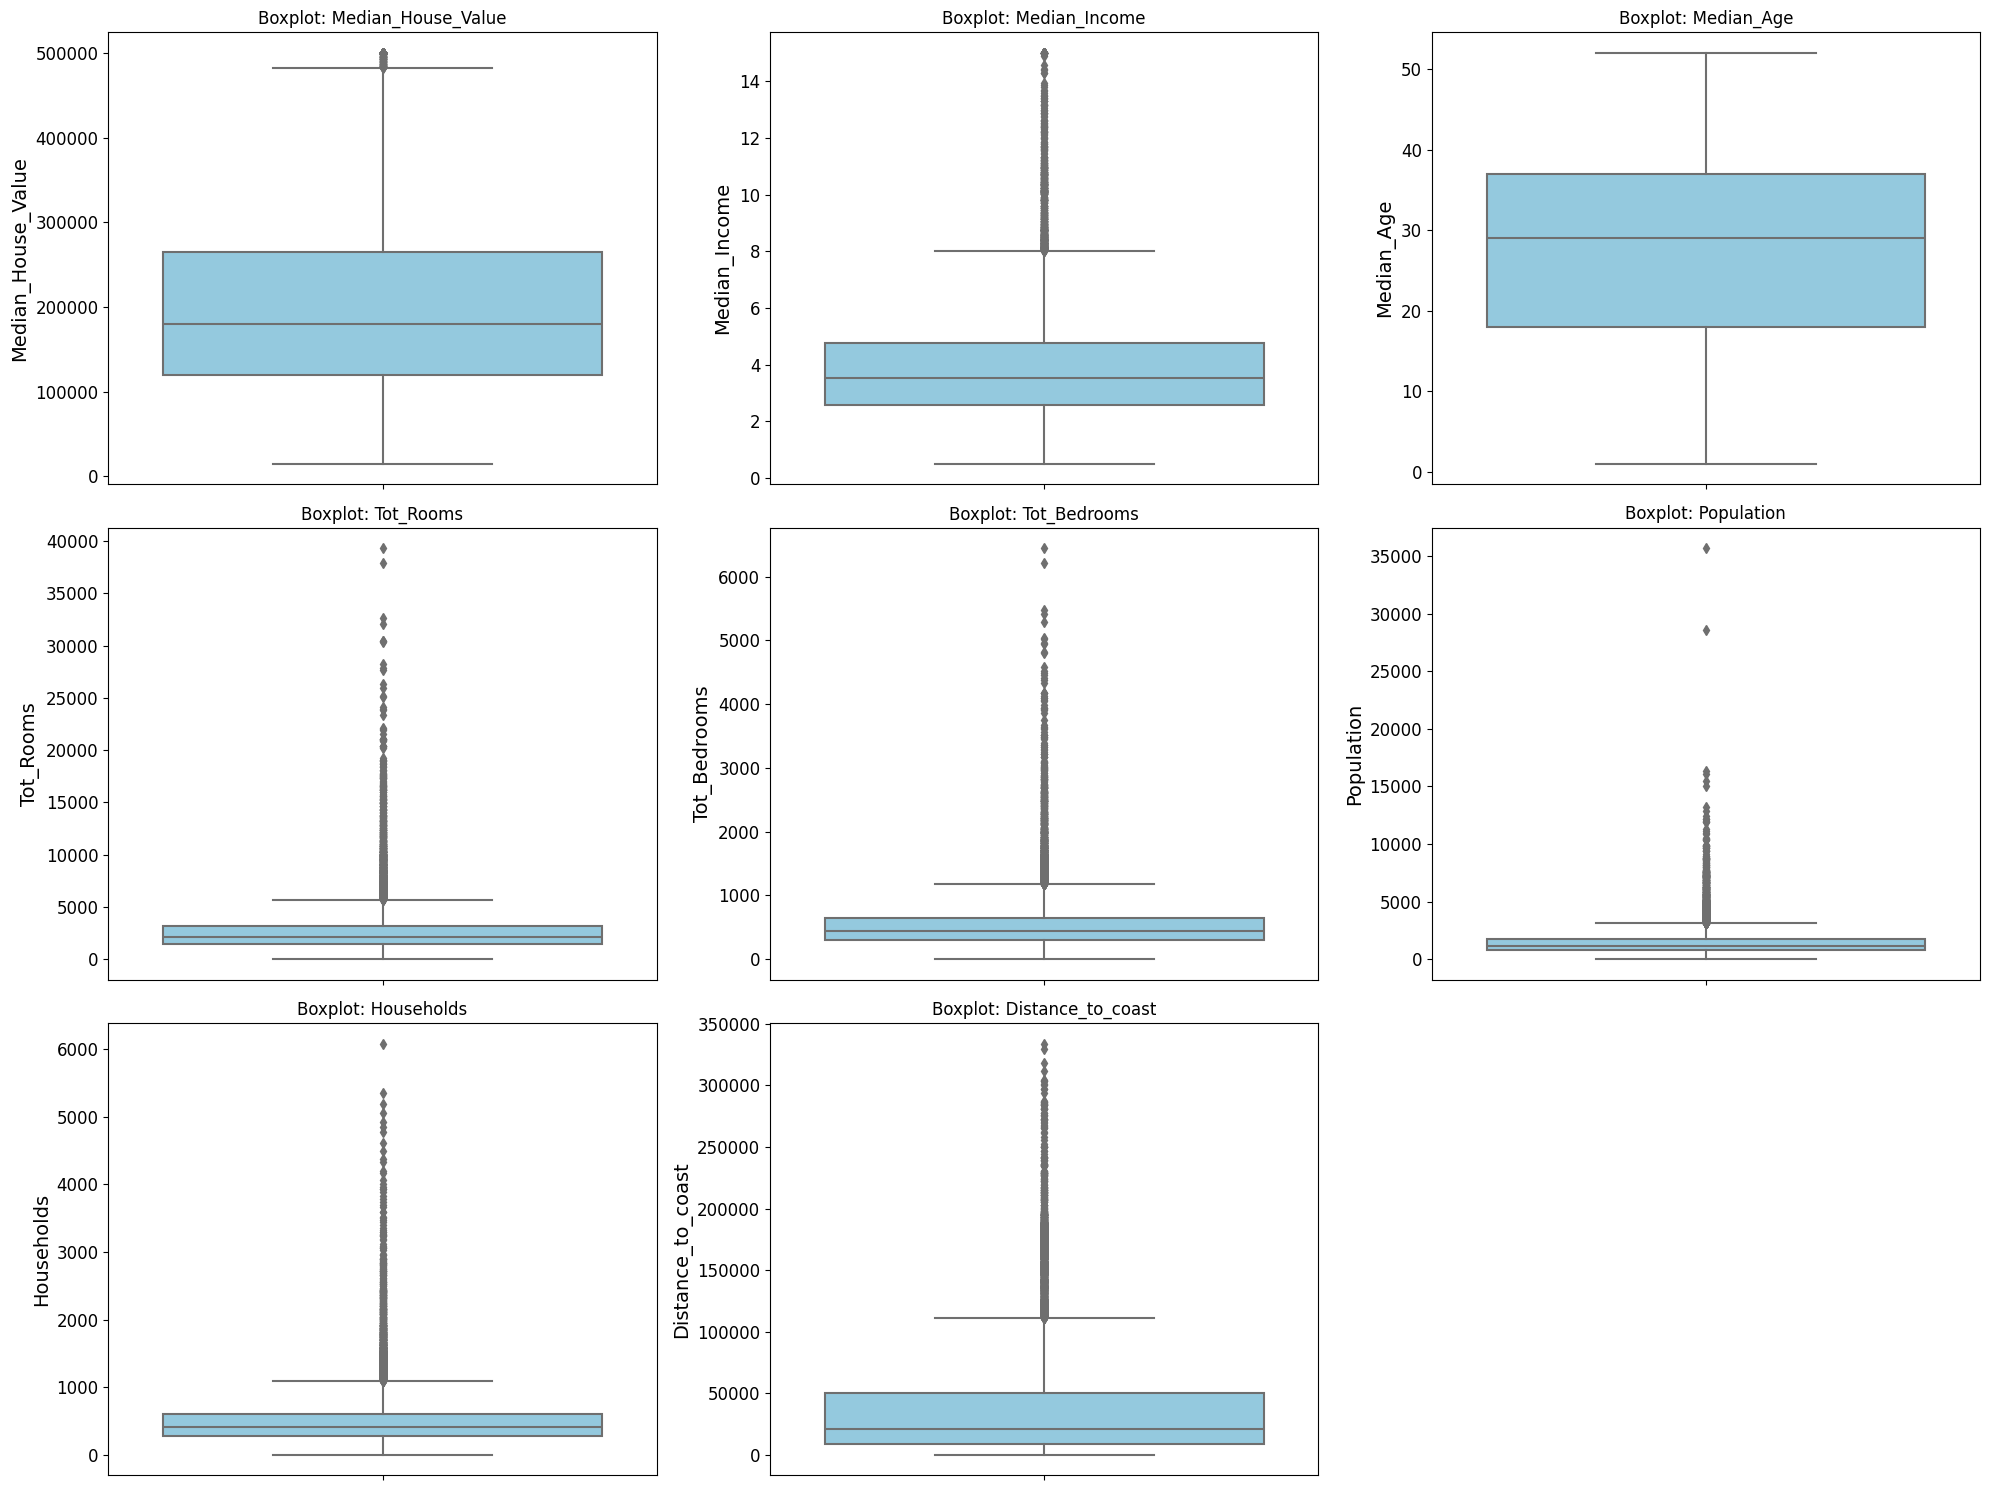

In [16]:

quant_vars = df2[["Median_House_Value", "Median_Income", "Median_Age", "Tot_Rooms", "Tot_Bedrooms", 
                 "Population", "Households", "Distance_to_coast"]]
plt.figure(figsize=(20, 15))

for i, var in enumerate(quant_vars, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df2[var], color='skyblue')
    plt.title(f'Boxplot: {var}')

plt.tight_layout()
plt.show()


C:\Users\WZ\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\WZ\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


C:\Users\WZ\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\WZ\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\WZ\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype)

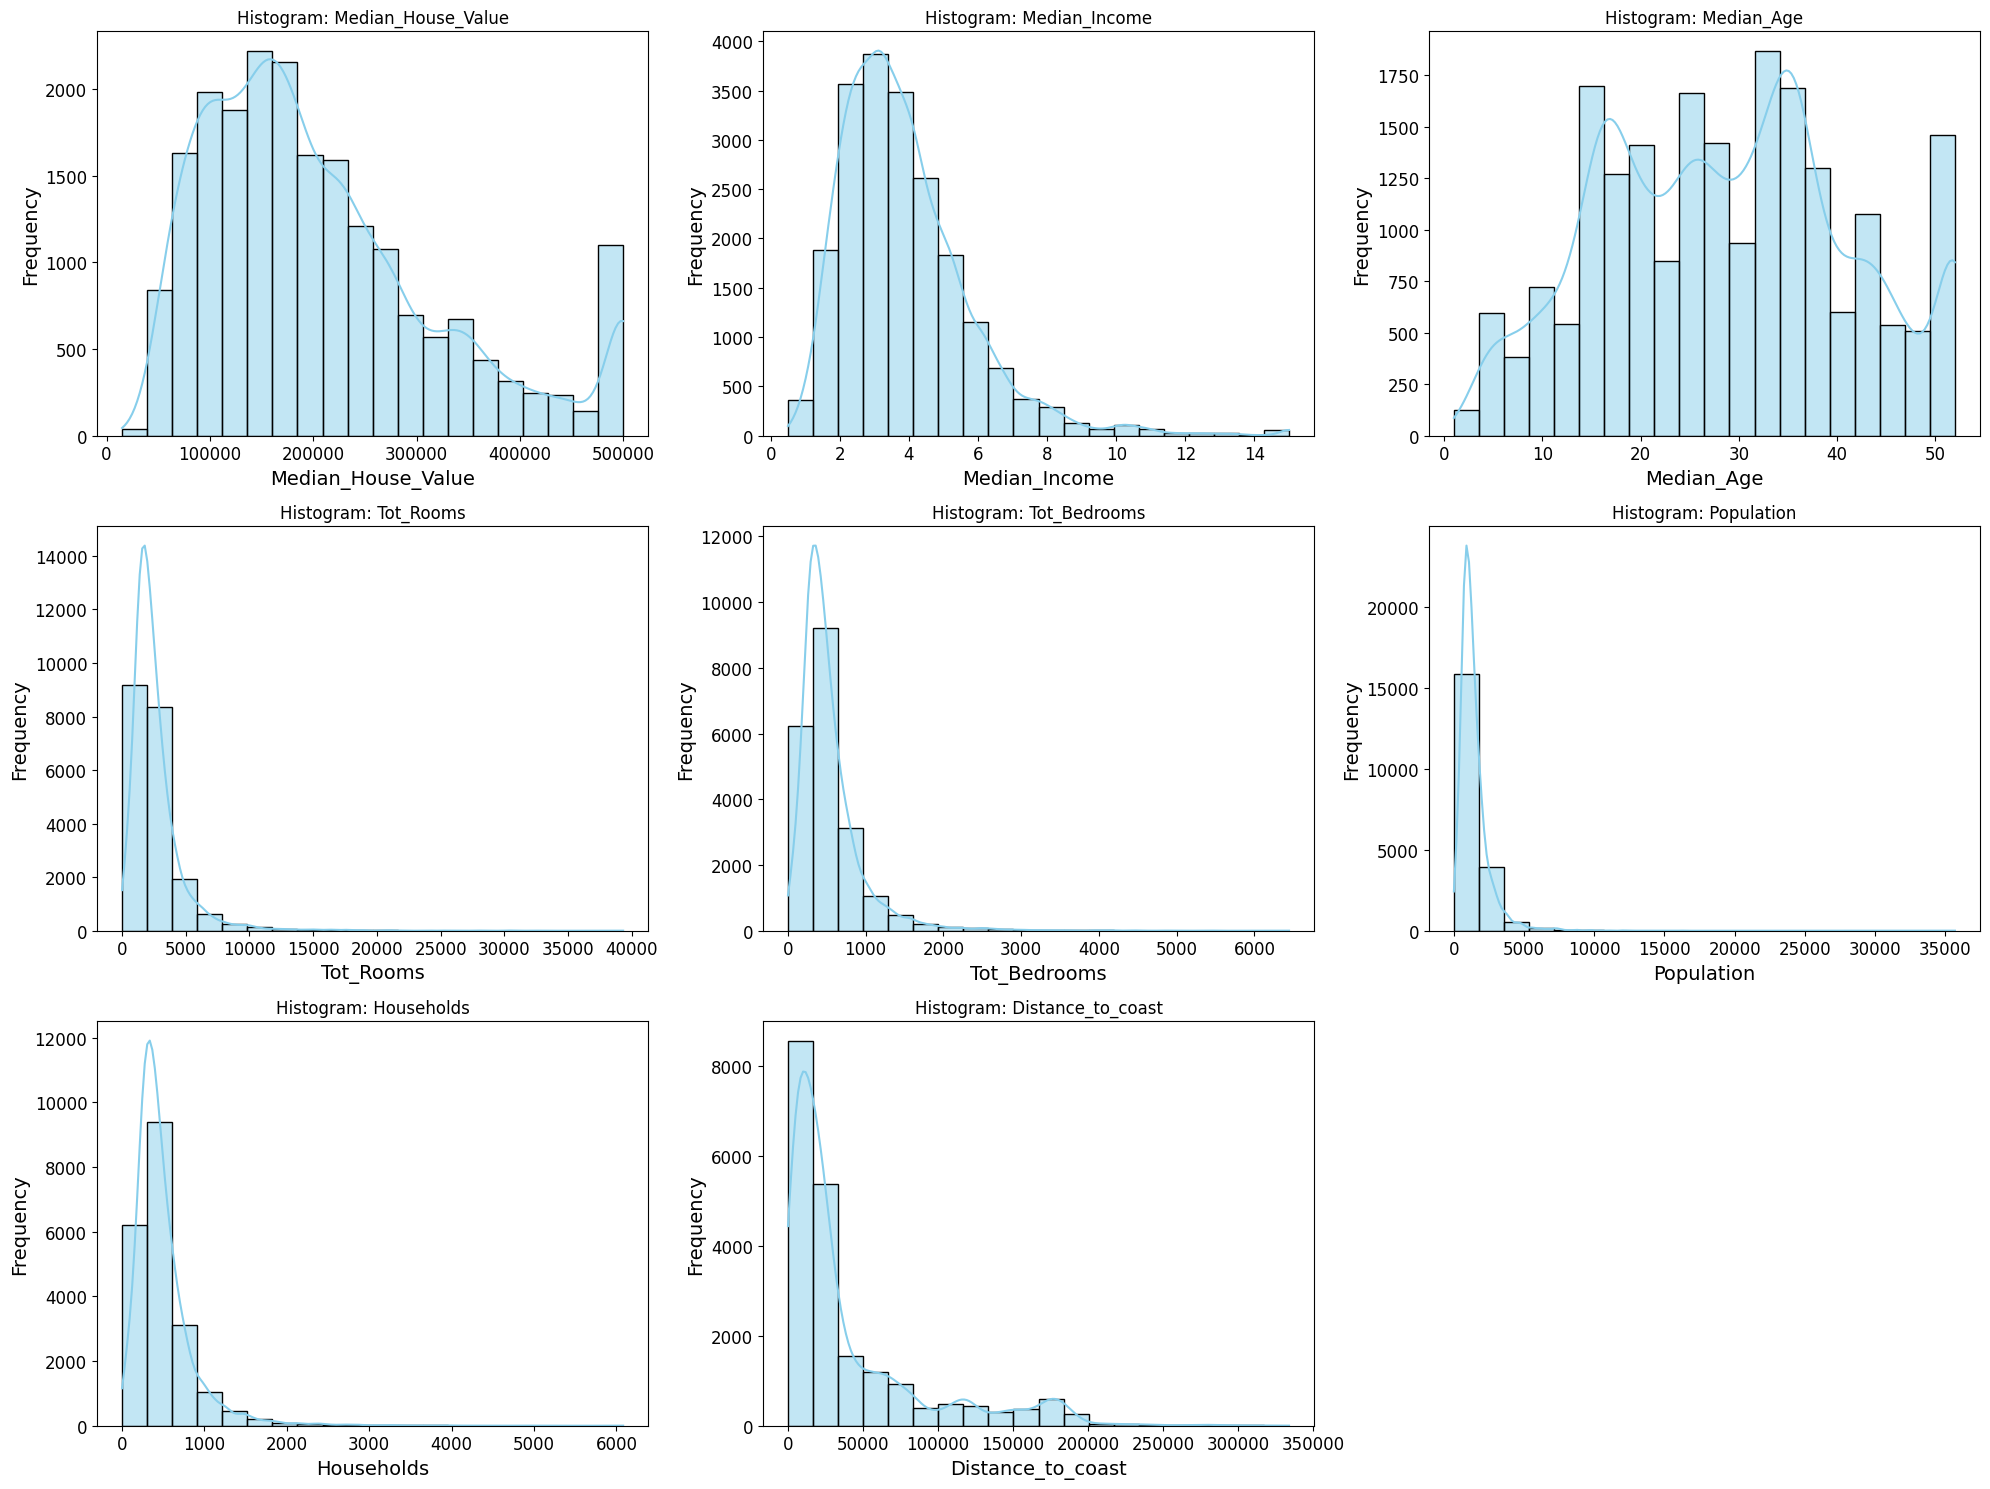

In [17]:

plt.figure(figsize=(20, 15))


for i, var in enumerate(quant_vars, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df2[var], bins=20, kde=True, color='skyblue')  # Adjust bins as needed
    plt.title(f'Histogram: {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


#### Look more carefully into the distribution of the "median_income" column
Hint : you may wish to change the \<bins> parameter

C:\Users\WZ\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\WZ\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


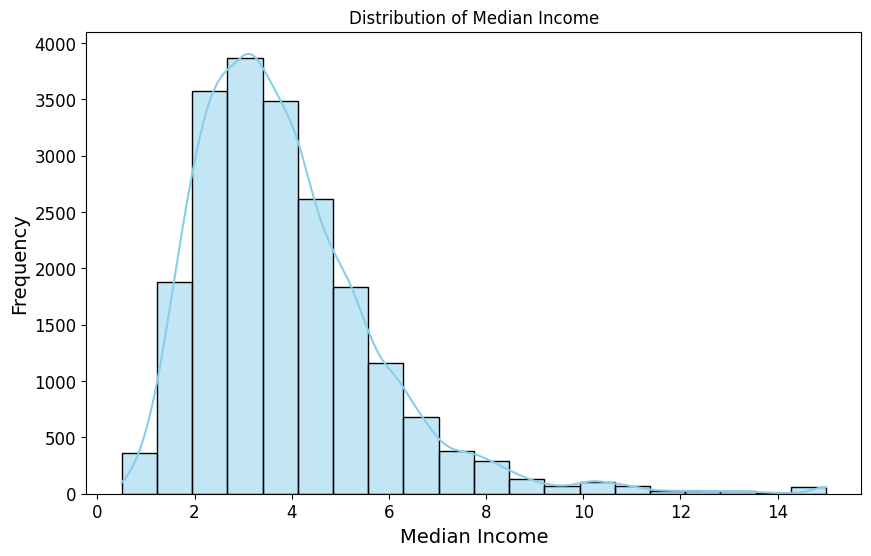

In [18]:

plt.figure(figsize=(10, 6))
sns.histplot(df2["Median_Income"], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Median Income')
plt.xlabel('Median Income')
plt.ylabel('Frequency')
plt.show()


C:\Users\WZ\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


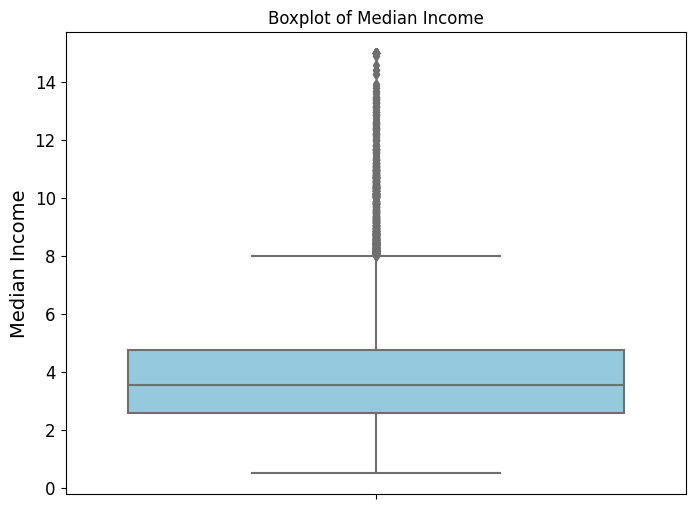

In [19]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df2["Median_Income"], color='skyblue')
plt.title('Boxplot of Median Income')
plt.ylabel('Median Income')
plt.show()

### Explain the following lines of code

### *``Your answers here``*

In [20]:
cat=[np.min(housing["Median_Income"])]
for i in [0.20, 0.40, 0.60, 0.80]:
    cat.append(housing["Median_Income"].quantile(i))
cat.append(np.max(housing["Median_Income"]))
print(cat)

[0.4999, 2.3523, 3.1406, 3.9669399999999997, 5.10972, 15.0001]


This code calculates and prints quantiles for the "Median_Income" column in the dataset. 
It calculates quantiles at various percentiles (20%, 40%, 60%, and 80%) and includes the minimum and maximum values of the "Median_Income" column. The result is a list of these calculated values.

Here's a breakdown of what the code does:

1. `cat` is initialized as a list with the minimum value of the "Median_Income" column.
2. A loop iterates over the specified percentiles (20%, 40%, 60%, and 80%).
3. Inside the loop, the code calculates the quantile value for each percentile using the `quantile` method of the "Median_Income" column and appends it to the `cat` list.
4. The maximum value of the "Median_Income" column is appended to the `cat` list.

After running this code, the `cat` list will contain the minimum, various quantiles, and the maximum values of the "Median_Income" column, which can be useful for understanding the distribution of this variable.

In [21]:
housing["income_cat"]=pd.cut(housing["Median_Income"], bins=cat, labels = [1,2,3,4,5], include_lowest=True)
#housing

This code creates a new column in the `housing` DataFrame called "income_cat" based on the "Median_Income" column. 
It uses the `pd.cut()` function to bin the values of "Median_Income" into discrete categories and assigns labels to these categories.

1. `pd.cut()` is used to create bins for the "Median_Income" column. The `bins` parameter specifies the bin edges, and `labels` specifies the labels to be assigned to each bin. `include_lowest=True` ensures that the lowest value is included in the first bin.

2. The resulting categories are assigned labels 1, 2, 3, 4, and 5, based on the bins specified in `labels`.

3. A new column "income_cat" is added to the `housing` DataFrame, containing the categorical values corresponding to the binned "Median_Income" values.

This categorization of income can be useful for various analyses or visualizations that require grouping individuals or households based on their income levels.

In [22]:
housing["income_cat"].value_counts()

income_cat
2    4131
1    4130
4    4128
5    4128
3    4123
Name: count, dtype: int64

Above code counts the number of occurrences of each category in the "income_cat" column of the `housing` DataFrame. It provides a summary of how many data points fall into each income category.

The result will be a Pandas Series where the index represents the category labels (e.g., 1, 2, 3, 4, 5), and the values represent the count of data points in each category. This information can be useful for understanding the distribution of income categories in the dataset.

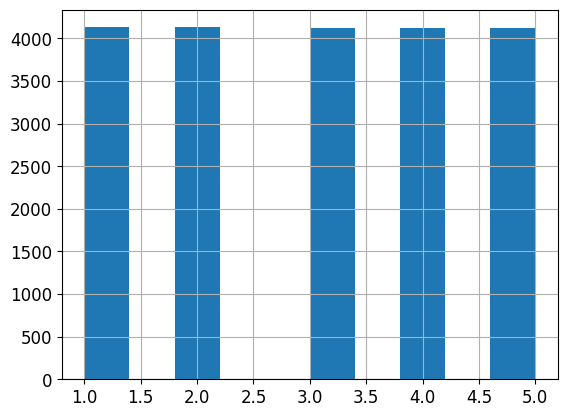

In [23]:
housing["income_cat"].hist();

This generates a histogram for the "income_cat" column of the `housing` DataFrame. This histogram visualizes the distribution of data points across different income categories.

Here's what each part of the code does:

- `housing["income_cat"]`: This selects the "income_cat" column from the DataFrame.
- `.hist()`: This is a Pandas method that creates a histogram of the selected column.
- `;`: This semicolon is used to suppress any additional text or output that might be displayed when plotting the histogram.


In [24]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Median_House_Value  20640 non-null  float64 
 1   Median_Income       20640 non-null  float64 
 2   Median_Age          20640 non-null  int64   
 3   Tot_Rooms           20640 non-null  int64   
 4   Tot_Bedrooms        20640 non-null  int64   
 5   Population          20640 non-null  int64   
 6   Households          20640 non-null  int64   
 7   Latitude            20640 non-null  float64 
 8   Longitude           20640 non-null  float64 
 9   Distance_to_coast   20640 non-null  float64 
 10  Closest_City        20640 non-null  object  
 11  income_cat          20640 non-null  category
dtypes: category(1), float64(5), int64(5), object(1)
memory usage: 1.8+ MB


The `.info()` method provides an overview of the DataFrame's structure and information. It displays the following details:

1. The total number of rows (samples) in the DataFrame.
2. The names of each column (features).
3. The count of non-null values in each column, which helps identify missing data.
4. The data type of each column, such as integers, floats, or objects (usually strings).
5. The memory usage of the DataFrame.

This method is useful for quickly inspecting the dataset, understanding its size, and checking for missing values and data types. It provides a summary of the DataFrame's metadata.

### Create a Test Set through stratified random sampling on the income variable

**Why a test set ?** <br>
**Why stratify the data on the income variable before generating a test set ?** <br>
Hint : use a seed = 42 for the reproductibility of the (re)samplings

Creating a test set through stratified random sampling is essential in machine learning to ensure that your test set accurately represents the distribution of the target variable (in this case, the "income" variable) in the population. The key reasons for using a test set and stratifying the data on the income variable are as follows:

1. Evaluation of Model Generalization: The primary purpose of a test set is to evaluate how well a machine learning model generalizes to new, unseen data. If the test set is not representative of the population's income distribution, the model's performance metrics may not accurately reflect its real-world performance.

2. Stratification for Representativeness: Stratified sampling on the income variable ensures that the test set contains a proportionate representation of different income levels or strata found in the population. This is crucial because you want to evaluate the model's performance for each income group or stratum, not just the overall performance.

3. Maintaining Consistency: Setting a seed (e.g., seed = 42) ensures reproducibility. When you need to rerun experiments or share results, using the same seed will lead to the same stratified sampling results, making your work more transparent and reproducible.



### *``Your answers here``*

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
train_strat, test_strat = train_test_split(housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)

Now generate an equivalent random split without stratification

In [27]:
train_random, test_random = train_test_split(housing, test_size=0.2, random_state=42)

#### Explain precisely what each of the two following cells do.

### *``Your answers here``*

In [28]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(test_strat),
    "Random": income_cat_proportions(test_random),
}).sort_index()

compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

This code is used to compare the proportions of income categories in the test sets generated through stratified sampling ("Stratified") and random sampling ("Random") to the proportions in the entire dataset ("Overall"). 
The percentage errors are calculated to assess how representative each sampling method is in terms of income category distribution.

The code in this cell performs the following steps:

1. `income_cat_proportions(data)`: This is a custom function that takes a DataFrame `data` as input. It calculates the proportions of each category in the "income_cat" column and returns a Series containing these proportions.

2. `train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)`: This line uses the `train_test_split` function to split the "housing" DataFrame into a training set (`train_set`) and a test set (`test_set`). The test set size is set to 20% of the entire dataset, and a random seed of 42 is used for reproducibility.

3. `compare_props`: This is a DataFrame created to compare the proportions of income categories in three different datasets: "Overall," "Stratified," and "Random."

4. `"Overall"`: This column of `compare_props` contains the proportions of income categories in the entire "housing" dataset, calculated using the `income_cat_proportions` function.

5. `"Stratified"`: This column contains the proportions of income categories in the test set (`test_strat`) generated using stratified sampling. It also uses the `income_cat_proportions` function.

6. `"Random"`: This column contains the proportions of income categories in the test set (`test_random`) generated using random sampling. It also uses the `income_cat_proportions` function.

7. `"Rand. %error"`: This column calculates the percentage error between the proportions in the "Random" column and the "Overall" column. It measures how much the random sampling deviates from the overall proportions.

8. `"Strat. %error"`: This column calculates the percentage error between the proportions in the "Stratified" column and the "Overall" column. It measures how much the stratified sampling deviates from the overall proportions.


In [29]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
income_cat,,,,,
1,0.200097,0.200097,0.202762,1.331719,-1.421085e-14
2,0.200145,0.200097,0.203973,1.912370,-2.420721e-02
3,0.199758,0.199612,0.205184,2.716469,-7.276255e-02
4,0.200000,0.200097,0.198886,-0.557171,4.844961e-02
5,0.200000,0.200097,0.189196,-5.402132,4.844961e-02


This cell displays newly created 'compare_props' DataFrame.

**For safety, copy the stratified train set to be used for modeling** <br>
Call your working copy \<houses_df>

In [30]:
houses_df = train_strat.copy()

In [160]:
train_strat

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Closest_City,income_cat
1405,182000.0,3.9816,10,7136,1691,2959,1507,37.96,-122.06,10235.180749,SanDiego,4
17718,355300.0,7.2707,8,3088,474,1799,456,37.33,-121.77,31247.007622,SanDiego,5
19928,87700.0,3.6895,29,2409,436,1142,440,36.32,-119.32,173659.998787,SanDiego,3
13782,104600.0,1.3993,28,3009,698,1200,626,34.03,-117.05,87439.318166,SanFrancisco,1
18138,351500.0,5.2108,31,3344,620,1604,572,37.34,-122.00,16588.263207,SanDiego,5
...,...,...,...,...,...,...,...,...,...,...,...,...
12704,141400.0,3.0890,18,6955,1882,2803,1740,38.58,-121.41,58281.418431,SanDiego,2
9894,156100.0,2.6518,40,1739,318,744,312,38.29,-122.30,17440.080774,SanDiego,2
19836,65000.0,2.7500,28,2201,429,1524,412,36.53,-119.40,182487.335025,SanDiego,2
18146,292900.0,7.2779,16,1156,198,455,216,37.35,-122.03,14704.872231,SanDiego,5


### Data Visualization : scatter plots

**Plot each row (observation) in the dataset as a geographical point** <br>
Hint : You may use figsize=(10,10), alpha=0.2)

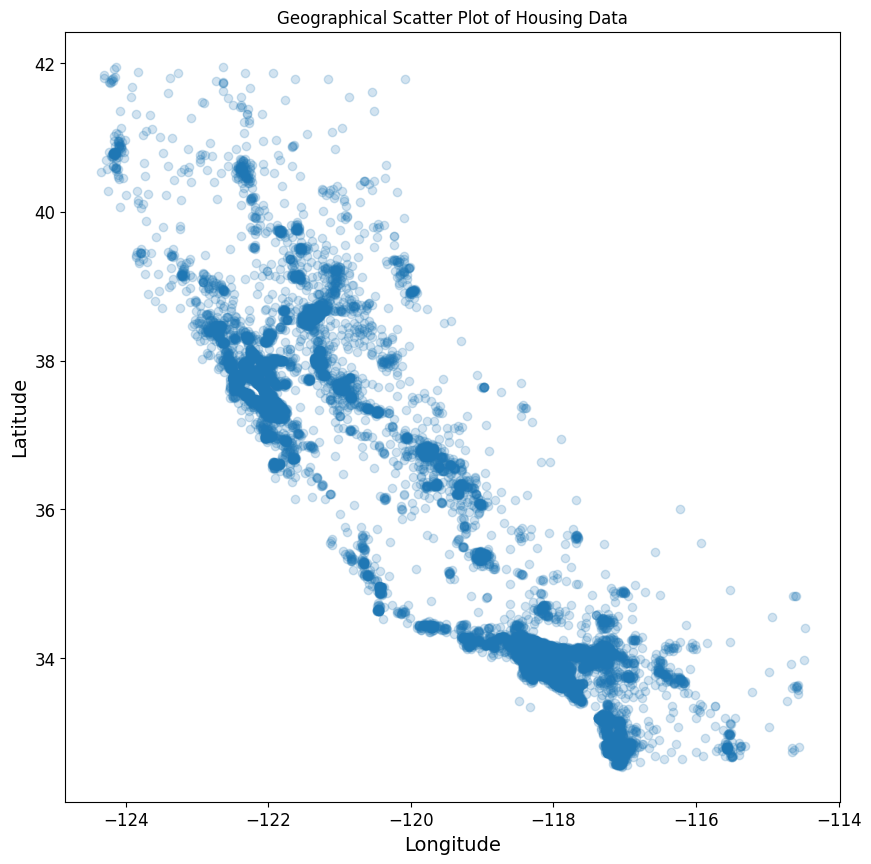

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.scatter(houses_df["Longitude"], houses_df["Latitude"], alpha=0.2)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geographical Scatter Plot of Housing Data")
plt.show()


### Geographic map of California houses values per district with population density

**Try to understand and comment on the following code**

# *``Your comments here``*

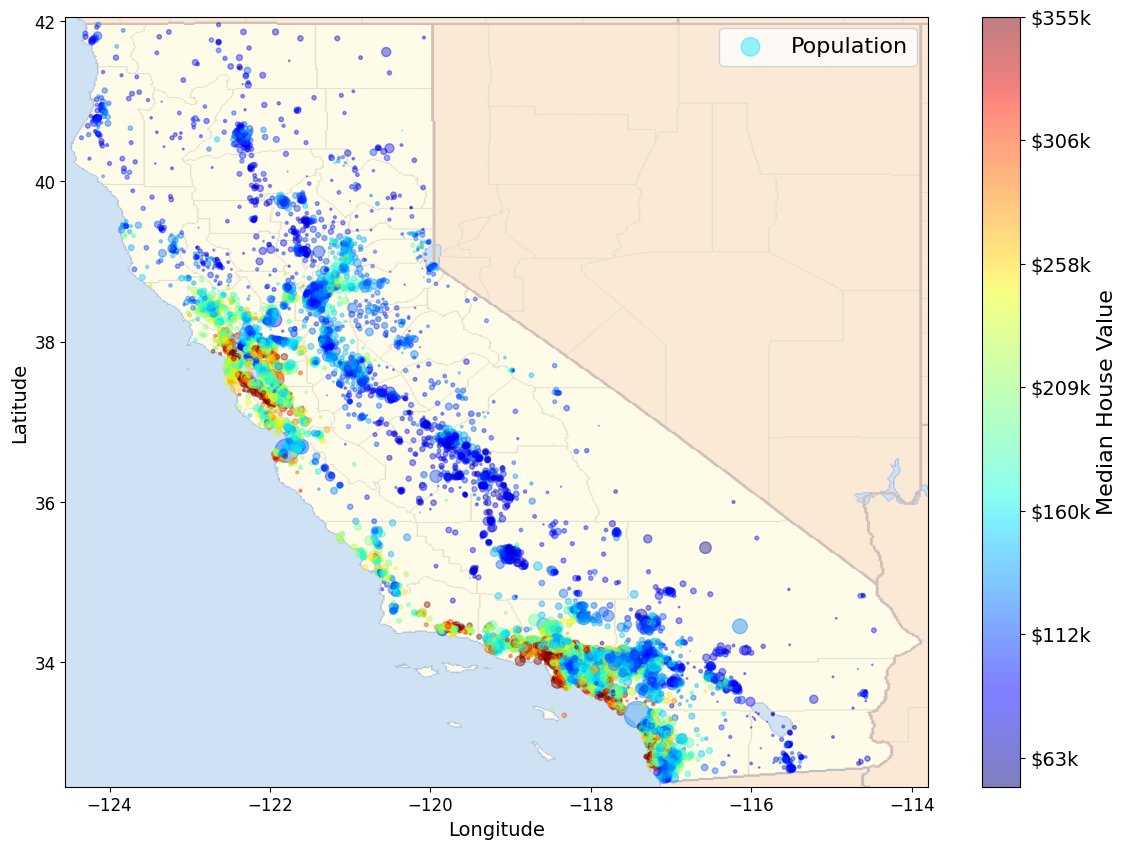

In [32]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.image as mpimg
california_img=mpimg.imread("california.png")
ax = houses_df.plot(kind="scatter", x="Longitude", y="Latitude", figsize=(14,10),
                       s=houses_df['Population']/100, label="Population",
                       c="Median_House_Value", cmap=plt.get_cmap("jet"),colorbar=False, alpha=0.4)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = houses_df["Median_House_Value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
plt.show()

This code generates a scatter plot of geographical data with some additional features. 
1. Import Necessary Libraries:
   - `warnings`: It suppresses warning messages.
   - `matplotlib.image as mpimg`: This allows to read and display an image in Matplotlib.

2. Load the California Map Image:
   - `california_img = mpimg.imread("california.png")`: This loads an image of California for background reference.

3. Create the Scatter Plot:
   - `ax = houses_df.plot(...)`: This creates a scatter plot using the housing data stored in `houses_df`. It plots the longitude on the x-axis and latitude on the y-axis.
   - `s=houses_df['Population']/100`: The size of each point is determined by the population, where larger circles represent higher population areas.
   - `c="Median_House_Value"`: The color of each point is based on the median house value.
   - `cmap=plt.get_cmap("jet")`: The colormap for coloring the points is "jet."
   - `colorbar=False`: This suppresses the colorbar by default.

4. Display the California Map as the Background:
   - `plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5, cmap=plt.get_cmap("jet"))`: This overlays the California map image on the scatter plot, specifying its extent (latitude and longitude bounds) and making it semi-transparent.

5. Add Labels and Legends:
   - `plt.ylabel("Latitude", fontsize=14)`: Sets the y-axis label.
   - `plt.xlabel("Longitude", fontsize=14)`: Sets the x-axis label.
   - `prices = houses_df["Median_House_Value"]` and `tick_values = np.linspace(prices.min(), prices.max(), 11)`: These lines prepare labels and values for the colorbar.
   - `cbar = plt.colorbar()`: Creates a colorbar.
   - `cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)`: Sets the colorbar tick labels in thousands.
   - `cbar.set_label('Median House Value', fontsize=16)`: Sets the colorbar label.
   - `plt.legend(fontsize=16)`: Displays the legend.

Overall, this code generates a scatter plot of housing data on top of an image of California, with points sized based on population and colored based on median house value. It provides geographic context to the data points.

### Bivariate Analysis

**How are the different variables related to each other two by two ?**

Compute the correlation matrix of all the quantitative variables <br>
Call it "houses_cor"

In [33]:
## your code here ##

In [34]:
houses_quant = houses_df[['Median_House_Value', 'Median_Income', 'Median_Age', 'Tot_Rooms',
       'Tot_Bedrooms', 'Population', 'Households','Distance_to_coast']]
houses_cor = houses_quant.corr()
houses_cor

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Distance_to_coast
Median_House_Value,1.000000,0.689597,0.105611,0.136635,0.052198,-0.023350,0.066550,-0.466959
Median_Income,0.689597,1.000000,-0.120037,0.202029,-0.007776,0.005136,0.013197,-0.243499
Median_Age,0.105611,-0.120037,1.000000,-0.359979,-0.318223,-0.295396,-0.300398,-0.221713
Tot_Rooms,0.136635,0.202029,-0.359979,1.000000,0.927990,0.852313,0.916679,-0.001871
Tot_Bedrooms,0.052198,-0.007776,-0.318223,0.927990,1.000000,0.875293,0.980579,-0.023576
Population,-0.023350,0.005136,-0.295396,0.852313,0.875293,1.000000,0.904064,-0.041550
Households,0.066550,0.013197,-0.300398,0.916679,0.980579,0.904064,1.000000,-0.063321
Distance_to_coast,-0.466959,-0.243499,-0.221713,-0.001871,-0.023576,-0.041550,-0.063321,1.000000


Display the most important correlations with the target variable : \<Median_House_Value> <br>
Why is it pertinent to choose this variable as outcome (target) ?

In [35]:
houses_cor.loc[:,'Median_House_Value']

Median_House_Value    1.000000
Median_Income         0.689597
Median_Age            0.105611
Tot_Rooms             0.136635
Tot_Bedrooms          0.052198
Population           -0.023350
Households            0.066550
Distance_to_coast    -0.466959
Name: Median_House_Value, dtype: float64

### *``Your comments here``* : because it will be used as the target when performing supervised machine learning

What are the predictors of \<Median_House_Value> worthy of interest and the nature of their relationship with the target ? <br>
**Provide the scatter plots of those predictors with the target**

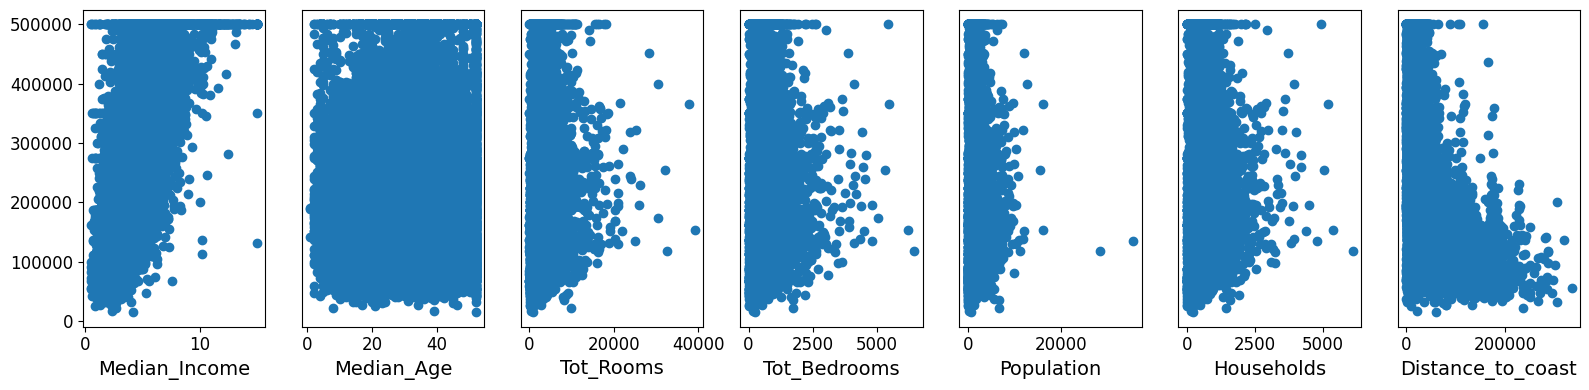

In [36]:
y_column = 'Median_House_Value'

num_columns = len(houses_quant.columns)

fig, axs = plt.subplots(1, num_columns - 1, figsize=(16, 4))

for i, x_column in enumerate(houses_quant.columns):
    if x_column != y_column:
        ax = axs[i - 1]
        ax.scatter(houses_quant[x_column], houses_quant[y_column])
        ax.set_xlabel(x_column)
    if i != 1:
        ax.get_yaxis().set_visible(False)


plt.tight_layout()
plt.show()


**What special observations are you drawing from these scatter plots?** <br>
Is the total number of rooms or bedrooms per district meaningful ? <br>
If so explain why, if not what are your suggestions ?

### *``Your answers here``*

Based on the scatterplots, Total Number of Rooms or Bedrooms does not seem to display either positive or negative correlations with Median House Value, indicating that house price in California relates weakly or does not relate directly to room numbers. 
Possible explainations is as followed: 
1. other variables such as location have a greater effect size to the housing market, thereby diminishing the impact of number of rooms on house price
2. demand for rooms is lower than the supply for rooms


**Create three new variables :**
1. Rooms per household
2. Bedrooms per rooms
3. People per household

In [37]:
houses_quant['Rooms_Per_Household'] = houses_quant['Tot_Rooms']/houses_quant['Households']
houses_quant['Bedrooms_Per_Rooms'] = houses_quant['Tot_Bedrooms']/houses_quant['Tot_Rooms']
houses_quant['People_Per_Household'] = houses_quant['Population']/houses_quant['Households']


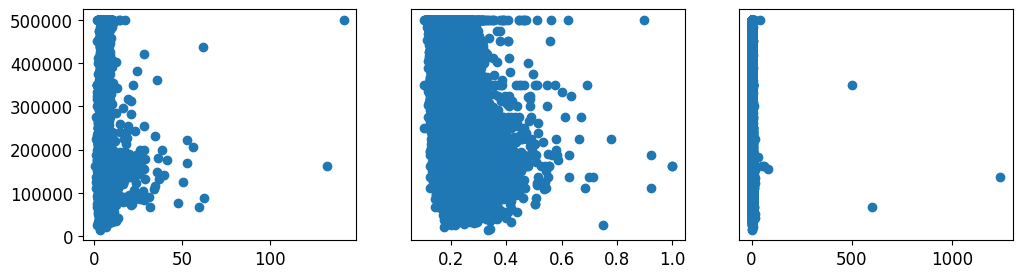

In [38]:
fig,ax=plt.subplots(1,3, figsize=(12,3))
ax[0].scatter(houses_quant['Rooms_Per_Household'],houses_quant['Median_House_Value'])
ax[1].scatter(houses_quant['Bedrooms_Per_Rooms'],houses_quant['Median_House_Value'])
ax[2].scatter(houses_quant['People_Per_Household'],houses_quant['Median_House_Value'])
ax[1].get_yaxis().set_visible(False)
ax[2].get_yaxis().set_visible(False)

**Let us again look at the correlation between the predictors and the target**

In [39]:
# correlation effect size - pearson r
updated_corr = houses_quant.corr().iloc[:,0].round(4)

In [40]:
# correlation significance - p value
import scipy.stats as stats
plist = []

for i in houses_quant.columns:
    r, p_value = stats.pearsonr(houses_quant['Median_House_Value'], houses_quant[i])
    plist.append(p_value)

In [41]:
corr_results = pd.DataFrame({'pearson r': updated_corr, 'p value': plist})
corr_results

,pearson r,p value
Median_House_Value,1.0000,0.000000e+00
Median_Income,0.6896,0.000000e+00
Median_Age,0.1056,3.594195e-42
Tot_Rooms,0.1366,1.239441e-69
Tot_Bedrooms,0.0522,1.926236e-11
Population,-0.0234,2.693936e-03
Households,0.0665,1.124395e-17
Distance_to_coast,-0.4670,0.000000e+00
Rooms_Per_Household,0.1466,5.888264e-80
Bedrooms_Per_Rooms,-0.2540,2.436926e-241


# Part 2 - Preparing data for Machine Learning

## 2.1 - Missing Values

### 2.1.1 - Case when there are missing values in one variable

Let us create a dataset where there are 10% of missing values in one variable

### *``Comment on each of the following cells``*

In [42]:
## Your comment here ##

import random
random.seed(42)
miss = np.random.choice(houses_df.index, 1651)

In [43]:
miss

array([19624, 15938, 17477, ..., 11819, 13609,  5299], dtype=int64)

In [159]:
houses_df

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Closest_City,income_cat
1405,182000.0,3.9816,10,7136,1691,2959,1507,37.96,-122.06,10235.180749,SanDiego,4
17718,355300.0,7.2707,8,3088,474,1799,456,37.33,-121.77,31247.007622,SanDiego,5
19928,87700.0,3.6895,29,2409,436,1142,440,36.32,-119.32,173659.998787,SanDiego,3
13782,104600.0,1.3993,28,3009,698,1200,626,34.03,-117.05,87439.318166,SanFrancisco,1
18138,351500.0,5.2108,31,3344,620,1604,572,37.34,-122.00,16588.263207,SanDiego,5
...,...,...,...,...,...,...,...,...,...,...,...,...
12704,141400.0,3.0890,18,6955,1882,2803,1740,38.58,-121.41,58281.418431,SanDiego,2
9894,156100.0,2.6518,40,1739,318,744,312,38.29,-122.30,17440.080774,SanDiego,2
19836,65000.0,2.7500,28,2201,429,1524,412,36.53,-119.40,182487.335025,SanDiego,2
18146,292900.0,7.2779,16,1156,198,455,216,37.35,-122.03,14704.872231,SanDiego,5


In [44]:
## Your comment here ##

houses_miss = houses_df.copy()

In [45]:
## Your comment here ##

houses_miss.loc[miss,"Tot_Bedrooms"] = None

In [46]:
## Your comment here ##

houses_miss.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 1405 to 4028
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Median_House_Value  16512 non-null  float64 
 1   Median_Income       16512 non-null  float64 
 2   Median_Age          16512 non-null  int64   
 3   Tot_Rooms           16512 non-null  int64   
 4   Tot_Bedrooms        14950 non-null  float64 
 5   Population          16512 non-null  int64   
 6   Households          16512 non-null  int64   
 7   Latitude            16512 non-null  float64 
 8   Longitude           16512 non-null  float64 
 9   Distance_to_coast   16512 non-null  float64 
 10  Closest_City        16512 non-null  object  
 11  income_cat          16512 non-null  category
dtypes: category(1), float64(6), int64(4), object(1)
memory usage: 2.0+ MB


**When we have missing values, there are two main possibilities :**
1. We simply drop the rows associated to the missing values
2. We estimate the missing values through an imputation method - the simplest and safest is to use the median

In [47]:
## Your comment here ##

houses_drop = houses_miss.dropna(subset=["Tot_Bedrooms"])

In [48]:
## Your comment here ##

houses_drop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14950 entries, 1405 to 4028
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Median_House_Value  14950 non-null  float64 
 1   Median_Income       14950 non-null  float64 
 2   Median_Age          14950 non-null  int64   
 3   Tot_Rooms           14950 non-null  int64   
 4   Tot_Bedrooms        14950 non-null  float64 
 5   Population          14950 non-null  int64   
 6   Households          14950 non-null  int64   
 7   Latitude            14950 non-null  float64 
 8   Longitude           14950 non-null  float64 
 9   Distance_to_coast   14950 non-null  float64 
 10  Closest_City        14950 non-null  object  
 11  income_cat          14950 non-null  category
dtypes: category(1), float64(6), int64(4), object(1)
memory usage: 1.4+ MB


Imputation with median

In [61]:
## Your comment here ##

houses_miss["Tot_Bedrooms"].fillna(houses_miss["Tot_Bedrooms"].median(), inplace=True) 

In [62]:
## Your comment here ##

houses_miss.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 1405 to 4028
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Median_House_Value  16512 non-null  float64 
 1   Median_Income       16512 non-null  float64 
 2   Median_Age          16512 non-null  int64   
 3   Tot_Rooms           16512 non-null  int64   
 4   Tot_Bedrooms        16512 non-null  float64 
 5   Population          16512 non-null  int64   
 6   Households          16512 non-null  int64   
 7   Latitude            16512 non-null  float64 
 8   Longitude           16512 non-null  float64 
 9   Distance_to_coast   16512 non-null  float64 
 10  Closest_City        16512 non-null  object  
 11  income_cat          16512 non-null  category
dtypes: category(1), float64(6), int64(4), object(1)
memory usage: 2.0+ MB


### 2.1.2 - Case where you have missing values in several variables

Let us now build a dataset with multiple missing values : <br>
Start with a function generating missing values in a chosen column of a dataframe

In [131]:
def col_miss (df, col, max_miss):
    '''
    df : a pandas dataframe
    col : the name of the variable column
    max_miss : the maximum number of missing values
    returns a data frame with a random number of missing values on col
    '''

    missing_count = np.random.randint(0, max_miss + 1) 
    missing_value = np.random.choice(df.index, missing_count, replace=False) 
    df.loc[missing_value, col] = np.nan
    
    return df 
    


In [141]:
# Copy the train set
housing_miss = houses_df.copy()
housing_miss.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 1405 to 4028
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Median_House_Value  16512 non-null  float64 
 1   Median_Income       16512 non-null  float64 
 2   Median_Age          16512 non-null  int64   
 3   Tot_Rooms           16512 non-null  int64   
 4   Tot_Bedrooms        16512 non-null  int64   
 5   Population          16512 non-null  int64   
 6   Households          16512 non-null  int64   
 7   Latitude            16512 non-null  float64 
 8   Longitude           16512 non-null  float64 
 9   Distance_to_coast   16512 non-null  float64 
 10  Closest_City        16512 non-null  object  
 11  income_cat          16512 non-null  category
dtypes: category(1), float64(5), int64(5), object(1)
memory usage: 2.0+ MB


Generate some missing values in the first 10 predictors of \<housing_miss>

In [140]:
## Your code here ##  

df_colmiss = housing_miss.iloc[:, 0:10]
df_colmiss.columns

Index(['Median_House_Value', 'Median_Income', 'Median_Age', 'Tot_Rooms',
       'Tot_Bedrooms', 'Population', 'Households', 'Latitude', 'Longitude',
       'Distance_to_coast'],
      dtype='object')

In [179]:
col_miss(housing_miss, df_colmiss.columns, 160)

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Closest_City,income_cat
1405,182000.0,3.9816,10.0,7136.0,1691.0,2959.0,1507.0,37.96,-122.06,10235.180749,SanDiego,4
17718,355300.0,7.2707,8.0,3088.0,474.0,1799.0,456.0,37.33,-121.77,31247.007622,SanDiego,5
19928,87700.0,3.6895,29.0,2409.0,436.0,1142.0,440.0,36.32,-119.32,173659.998787,SanDiego,3
13782,104600.0,1.3993,28.0,3009.0,698.0,1200.0,626.0,34.03,-117.05,87439.318166,SanFrancisco,1
18138,351500.0,5.2108,31.0,3344.0,620.0,1604.0,572.0,37.34,-122.00,16588.263207,SanDiego,5
...,...,...,...,...,...,...,...,...,...,...,...,...
12704,141400.0,3.0890,18.0,6955.0,1882.0,2803.0,1740.0,38.58,-121.41,58281.418431,SanDiego,2
9894,156100.0,2.6518,40.0,1739.0,318.0,744.0,312.0,38.29,-122.30,17440.080774,SanDiego,2
19836,65000.0,2.7500,28.0,2201.0,429.0,1524.0,412.0,36.53,-119.40,182487.335025,SanDiego,2
18146,292900.0,7.2779,16.0,1156.0,198.0,455.0,216.0,37.35,-122.03,14704.872231,SanDiego,5


In [180]:
housing_miss.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 1405 to 4028
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Median_House_Value  16106 non-null  float64 
 1   Median_Income       16106 non-null  float64 
 2   Median_Age          16106 non-null  float64 
 3   Tot_Rooms           16106 non-null  float64 
 4   Tot_Bedrooms        16106 non-null  float64 
 5   Population          16106 non-null  float64 
 6   Households          16106 non-null  float64 
 7   Latitude            16106 non-null  float64 
 8   Longitude           16106 non-null  float64 
 9   Distance_to_coast   16106 non-null  float64 
 10  Closest_City        16512 non-null  object  
 11  income_cat          16512 non-null  category
dtypes: category(1), float64(10), object(1)
memory usage: 2.0+ MB


Now, he have a dataset with missing values in all the quantitative predictors

#### How many missing values are there in each variable ?

In [144]:
## Your code here ##

housing_miss.isna().sum()

Median_House_Value    103
Median_Income         103
Median_Age            103
Tot_Rooms             103
Tot_Bedrooms          103
Population            103
Households            103
Latitude              103
Longitude             103
Distance_to_coast     103
Closest_City            0
income_cat              0
dtype: int64

#### Let us use sklearn to do multiple imputation, with existing modules

In [145]:
# Start with simple imputer
from sklearn.impute import SimpleImputer

**Using Simple Imputer, impute missing data in each variable by replacing missing values with the mean**

In [146]:
## Your code here ##
from sklearn.impute import SimpleImputer

X = SimpleImputer(strategy='mean').fit_transform(df_colmiss)

In [165]:
X_df = pd.DataFrame(X, columns=df_colmiss.columns)
X_df = X_df.set_index(df_colmiss.index)

X_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 1405 to 4028
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Median_House_Value  16512 non-null  float64
 1   Median_Income       16512 non-null  float64
 2   Median_Age          16512 non-null  float64
 3   Tot_Rooms           16512 non-null  float64
 4   Tot_Bedrooms        16512 non-null  float64
 5   Population          16512 non-null  float64
 6   Households          16512 non-null  float64
 7   Latitude            16512 non-null  float64
 8   Longitude           16512 non-null  float64
 9   Distance_to_coast   16512 non-null  float64
dtypes: float64(10)
memory usage: 1.4 MB


In [168]:
housing_miss[df_colmiss.columns] = X_df

In [169]:
housing_miss.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 1405 to 4028
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Median_House_Value  16512 non-null  float64 
 1   Median_Income       16512 non-null  float64 
 2   Median_Age          16512 non-null  float64 
 3   Tot_Rooms           16512 non-null  float64 
 4   Tot_Bedrooms        16512 non-null  float64 
 5   Population          16512 non-null  float64 
 6   Households          16512 non-null  float64 
 7   Latitude            16512 non-null  float64 
 8   Longitude           16512 non-null  float64 
 9   Distance_to_coast   16512 non-null  float64 
 10  Closest_City        16512 non-null  object  
 11  income_cat          16512 non-null  category
dtypes: category(1), float64(10), object(1)
memory usage: 2.0+ MB


In [171]:
housing_miss

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Closest_City,income_cat
1405,182000.0,3.9816,10.0,7136.0,1691.0,2959.0,1507.0,37.96,-122.06,10235.180749,SanDiego,4
17718,355300.0,7.2707,8.0,3088.0,474.0,1799.0,456.0,37.33,-121.77,31247.007622,SanDiego,5
19928,87700.0,3.6895,29.0,2409.0,436.0,1142.0,440.0,36.32,-119.32,173659.998787,SanDiego,3
13782,104600.0,1.3993,28.0,3009.0,698.0,1200.0,626.0,34.03,-117.05,87439.318166,SanFrancisco,1
18138,351500.0,5.2108,31.0,3344.0,620.0,1604.0,572.0,37.34,-122.00,16588.263207,SanDiego,5
...,...,...,...,...,...,...,...,...,...,...,...,...
12704,141400.0,3.0890,18.0,6955.0,1882.0,2803.0,1740.0,38.58,-121.41,58281.418431,SanDiego,2
9894,156100.0,2.6518,40.0,1739.0,318.0,744.0,312.0,38.29,-122.30,17440.080774,SanDiego,2
19836,65000.0,2.7500,28.0,2201.0,429.0,1524.0,412.0,36.53,-119.40,182487.335025,SanDiego,2
18146,292900.0,7.2779,16.0,1156.0,198.0,455.0,216.0,37.35,-122.03,14704.872231,SanDiego,5


**Using KNNImputer, impute missing data in each variable**

In [177]:
col_miss(housing_miss, df_colmiss.columns, 160)

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Closest_City,income_cat
1405,182000.0,3.9816,10.0,7136.0,1691.0,2959.0,1507.0,37.96,-122.06,10235.180749,SanDiego,4
17718,355300.0,7.2707,8.0,3088.0,474.0,1799.0,456.0,37.33,-121.77,31247.007622,SanDiego,5
19928,87700.0,3.6895,29.0,2409.0,436.0,1142.0,440.0,36.32,-119.32,173659.998787,SanDiego,3
13782,104600.0,1.3993,28.0,3009.0,698.0,1200.0,626.0,34.03,-117.05,87439.318166,SanFrancisco,1
18138,351500.0,5.2108,31.0,3344.0,620.0,1604.0,572.0,37.34,-122.00,16588.263207,SanDiego,5
...,...,...,...,...,...,...,...,...,...,...,...,...
12704,141400.0,3.0890,18.0,6955.0,1882.0,2803.0,1740.0,38.58,-121.41,58281.418431,SanDiego,2
9894,156100.0,2.6518,40.0,1739.0,318.0,744.0,312.0,38.29,-122.30,17440.080774,SanDiego,2
19836,65000.0,2.7500,28.0,2201.0,429.0,1524.0,412.0,36.53,-119.40,182487.335025,SanDiego,2
18146,292900.0,7.2779,16.0,1156.0,198.0,455.0,216.0,37.35,-122.03,14704.872231,SanDiego,5


In [184]:
## Your code here ##

from sklearn.impute import KNNImputer 
X = pd.DataFrame(KNNImputer().fit_transform(df_colmiss), columns = df_colmiss.columns)

In [185]:
## Your code here ##

X_df = pd.DataFrame(X, columns=df_colmiss.columns)
X_df = X_df.set_index(df_colmiss.index)

In [189]:
## Your code here ##
housing_miss[df_colmiss.columns] = X_df
housing_miss.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 1405 to 4028
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Median_House_Value  16512 non-null  float64 
 1   Median_Income       16512 non-null  float64 
 2   Median_Age          16512 non-null  float64 
 3   Tot_Rooms           16512 non-null  float64 
 4   Tot_Bedrooms        16512 non-null  float64 
 5   Population          16512 non-null  float64 
 6   Households          16512 non-null  float64 
 7   Latitude            16512 non-null  float64 
 8   Longitude           16512 non-null  float64 
 9   Distance_to_coast   16512 non-null  float64 
 10  Closest_City        16512 non-null  object  
 11  income_cat          16512 non-null  category
dtypes: category(1), float64(10), object(1)
memory usage: 2.0+ MB


### Which imputer is better : SimpleImputer or KNNImputer ?

SimpleImputer or KNNImputer depends on specific dataset and the nature of the missing data. If we are dealing a dataset with simple missing data patterns, SimpleImputer is fast and sufficient. 

On the other hand, if our data has complex relationships and we do not want lose those information, or if we have high-dimensional data, KNNImputer is better. 

### *``Your answers here``*

## 2.2 - Categorical variables...

In [ ]:
houses_df.info()

We have two categorical variables :
1. "Closest_city" is nominal
2. "income_cat" is ordinal
**Explain the difference between nominal and ordinal variables**

### *``Your answers here``*

### 2.2.1 - Introducing onehot encoding

"Closest_city" has four modalities : the four city names <br>
"income_cat" has five modalities : the five intervals that we have labeled 1,2,3,4,5. However as you see in the graph and in the original values - cat =  [0.4999, 2.3523, 3.1406, 3.9669399999999997, 5.10972, 15.0001] these intervals are not equidistant, so you cannot really add nor substract them meaningfully. <br>
**In short, both categorical variables should be considered nominal**

### *So, what is one hot encoding ?*

1. Count the number of modalities in your categorical variable - assume we have k modalities
2. Create k  dummy variables with k modalities where the values are 1 for the corresponding modalities, otherwise 0 <br>
*Warning : this method is forbidden for analytical solutions and with Linear Regression without regularization. <br>
For more information : [see here](https://inmachineswetrust.com/posts/drop-first-columns/#cell7)*

In [ ]:
# Let us select our categorical variables
houses_cat = houses_df[["Closest_city","income_cat"]]

In [ ]:
# Call for onehot encoder. Choose a dense rather than a sparse vector
from sklearn.preprocessing import OneHotEncoder as OHE
onehot = OHE(sparse=False)
houses_onehot = onehot.fit_transform(houses_cat)

In [ ]:
houses_onehot

In [ ]:
onehot.categories_

### 2.2.2 - Building a Pipeline

Let us first discover how a pipeline operates...

In [ ]:
# Copy once again the original train set
housing_df = train_strat.copy()
housing_df.info()

Let us start with a custom transformer to be used to add attributes

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]


In [ ]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
houses_plus = attr_adder.transform(housing_df.values)

#### What do these codes actually accomplish ?
Hint : sklearn uses duck typing, not inheritance.<br>
To find our more about Duck Typing, [go here](https://youtu.be/N6sst3aH_FA)

### *``Your answers here``*

In [ ]:
# Check your answers...

houses_plus_df = pd.DataFrame(houses_plus,
                              columns=list(housing_df.columns)+["rooms_per_household", "population_per_household"],
                              index=housing_df.index)

houses_plus_df.info()

### 2.2.3 - Pipeline for the quantitative variables

For the quantitative variables, let us generate a pipeline with the following steps
1. Impute missing values with the "median" method
2. Add two new attributes : rooms per household and population per household
3. Standardize the training set

#### Let us restart with a new training set from a dataset with missing values

In [ ]:
train = housing_miss[housing_miss.columns[0:12]]
train.info()

In [ ]:
quanti_features = list(train.columns[1:10])
cat_features = ["Closest_city","income_cat"]
train_quanti = train[quanti_features]

In [ ]:
train_quanti.info()

**Define the pipeline which will go through three steps :**
1. Impute missing data with the median method
2. Combine three new attributes
3. Standardize the quantitative features

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

quanti_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()), # this will add 3 attributes
        ('std_scaler', StandardScaler()),
    ])

houses_quanti = quanti_pipeline.fit_transform(train_quanti)

In [ ]:
houses_quanti

#### Explain the previous cells of codes and what they aim to accomplish

### *``Your answers here``*

**How many features should we have at this step ?** 

In [ ]:
## Justify your answer with a code here ##

### 2.2.4 - Pipeline for the quantitative and categorical variables

Now let us include the categorical variables

In [ ]:
from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer([
        ("num", quanti_pipeline, quanti_features),
        ("cat", OHE(), cat_features),
    ])

houses_ready = full_pipeline.fit_transform(train)

**How many features should we have at this step ? Explain !**

In [ ]:
## Justify your answer with a code here ##

# Part 3 - Machine Learning

First of all, define the target (outcome) and the predictors (features)

In [ ]:
y = ## Your code here ##
X = ## Your code here ##

## 3.1 - Learning and evaluating with the training set only

#### Linear Regression
Start with the most classical Linear Regression <br>
Check that this algorithm does not use Ordinary Least Square with matrix inversion

In [ ]:
## Your code here ##

Estimate performance with Mean Squared Error and Mean Absolute Error

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
## Your code here ##

In [ ]:
## Print your results (code) ##

#### Decision Tree Regression

In [ ]:
## Your code here ##

Estimate performance with Mean Squared Error and Mean Absolute Error

In [ ]:
## Your code here ##

In [ ]:
## Print your results (code) ##

#### Comment on these first results

### *``Your answers here``*

## 3.2 - Estimating the models with *cross validation*

**Explain what the following function accomplishes**

In [ ]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

### *``Your answers here``*

#### Linear Regression

In [ ]:
lr = LinearRegression()

In [ ]:
from sklearn.model_selection import cross_val_score

lr_scores = ## Your code here ##
lr_rmse = ## Your code here ##
## Your code here ##

#### Penalized Linear Regression (Elasticnet)

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
####################
## Your code here ##
####################

#### Decision Trees

In [ ]:
## Your code here ##

In [ ]:
####################
## Your code here ##
####################

***Compare the results of the evaluation (scores) using the training set with the evaluation (scores) using cross validation. <br>
What are your conclusions ?***

### *``Your answers here``*

#### Random Forests

In [ ]:
## Your code here ##

In [ ]:
####################
## Your code here ##
####################

#### Support Vector Machines

In [ ]:
## Your code here ##

In [ ]:
####################
## Your code here ##
####################

## 3.3 - Tuning the model with Grid Search and Randomized Search

#### Example : Random Forest

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
rf_grid = {'n_estimators': [30,60,100], 'max_features': [8,10,15]}

####################
## Your code here ##
####################

In [ ]:
## Display the hyperparameters of the best model (code) ##

In [ ]:
## Print the score of the best model (code)##

#### Example : ElasticNet

In [ ]:
en_grid = {'alpha': np.logspace(-3, 4, 10), 'l1_ratio':np.linspace(0,1,11) }

####################
## Your code here ##
####################

In [ ]:
## Display the hyperparameters of the best model (code) ##

In [ ]:
## Print the score of the best model (code)##

#### Example Decision Tree

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
cart_grid = {"min_samples_split": range(1,10),"min_samples_leaf": range(1,60)}

####################
## Your code here ##
####################

In [ ]:
## Display the hyperparameters of the best model (code) ##

In [ ]:
## Print the score of the best model (code)##

## 3.4 - Final question : how good are our models in predicting unseen data ?

In [ ]:
# Start by checking the structure of the test set (code) #
## Your code here ##

### Prepare your test set to be evaluated on the tuned models

In [ ]:
# Now prepare our test set
## Your code here ##

In [ ]:
# Define your target (outcome) and your predictors #
## Your code here ##

#### Random Forest

In [ ]:
# Estimate the performance of your test set on the best cross-validated Random Forest model #

####################
## Your code here ##
####################

#### ElaticNet

In [ ]:
# Estimate the performance of your test set on the best cross-validated Elasticnet model #

####################
## Your code here ##
####################

#### Decision Tree

In [ ]:
# Estimate the performance of your test set on the best cross-validated Decision Tree model #

####################
## Your code here ##
####################

#### Linear Regression

In [ ]:
# Estimate the performance of your test set on the Linear Regression model #

####################
## Your code here ##
####################

### Machine Learning Conclusion
**In the light of all these information, what have your learned about :**
1. Overfitting
2. Tuning a learner
3. Model performance
4. Else ?
Please write a complete but synthetic essay on your learning experience

### <span style="color:blue">Full Homework to be submitted on session #7</span>